In [78]:
import numpy as np

In [79]:
def parFun(alpha=1.0, beta=0.2, mu1_max=0.45, mu2_max=0.2, mu3_max=0.33, Y1=0.15, Y2=0.74, Y3=0.50, K1=0.1, K2=0.02, K3=0.001,
         phi1=0.41, phi2=1.067, phi3=2.087, phi4=0.95, kLa=350.0, KO2=0.0001, KO3=0.0001, gamma1=10.0, gamma2=10.0,
         gamma3=0.1, alpha_star=0.1, O_star=7.5):

         return alpha, beta, mu1_max, mu2_max, mu3_max, Y1, Y2, Y3, K1, K2, K3, phi1, phi2, phi3, phi4, kLa, \
                    KO2, KO3, gamma1, gamma2, gamma3, alpha_star, O_star

def odeFun(t, vars, pars):
    
    X, G, E, O, e1, e2, e3, C = vars
    alpha, beta, mu1_max, mu2_max, mu3_max, Y1, Y2, Y3, K1, K2, K3, phi1, phi2, phi3, phi4, kLa, \
                    KO2, KO3, gamma1, gamma2, gamma3, alpha_star, O_star = pars

    mu1 = mu1_max * (mu1_max + beta) / (alpha + alpha_star)
    mu2 = mu2_max * (mu2_max + beta) / (alpha + alpha_star)
    mu3 = mu3_max * (mu3_max + beta) / (alpha + alpha_star)

    if G > 0:
        r1 = mu1 * G / (K1 + G)
        if O > 0:
            r3 = mu3 * (G / (K3 + G)) * (O / (KO3 + O))
        else:
            r3 = 0
    else:
        r1 = 0
        r3 = 0

    if E > 0:
        r2 = mu2 * (E / (K2 + E)) * (O / (KO2 + O))
    else:
        r2 = 0

    # r1 = np.sqrt(r1 ** 2)
    # r2 = np.sqrt(r2 ** 2)
    # r3 = np.sqrt(r3 ** 2)

    u1 = r1 / ((r1 + r2 + r3) + 1e-10)
    u2 = r2 / ((r1 + r2 + r3) + 1e-10)
    u3 = r3 / ((r1 + r2 + r3) + 1e-10)

    v1 = r1 / (np.max(r1 + r2 + r3) + 1e-10)
    v2 = r2 / (np.max(r1 + r2 + r3) + 1e-10)
    v3 = r3 / (np.max(r1 + r2 + r3) + 1e-10)

    r1 = r1 * e1
    r2 = r2 * e2
    r3 = r3 * e3

    # D = 0
    sumr1v1 = (r1*v1 + r2*v2 + r3*v3)

    # dXdt
    dXdt = (sumr1v1) * X

    dCdt = gamma3*r3*v3 - (gamma1*r1*v1 + gamma2*r2*v2) * C - sumr1v1 * C
    # dCdt = 0

    dGdt = - (r1*v1/Y1 + r3*v3/Y3)*X - phi4*(C*dXdt + dCdt)
    dEdt = (phi1*r1*v1/Y1 - r2*v2/Y2) * X

    dOdt = kLa * (O_star - O) - (phi2*r2*v2/Y2 + phi3*r3*v3/Y3) * X
    # dOdt = 0

    de1dt = alpha/1000 * u1 * (G / (K1 + G)) - (sumr1v1 + beta) * e1 + alpha_star
    de2dt = alpha * u2 * (E / (K2 + E)) - (sumr1v1 + beta) * e2 + alpha_star
    de3dt = alpha * u3 * (G / (K3 + G)) - (sumr1v1 + beta) * e3 + alpha_star

    output = dXdt, dGdt, dEdt, dOdt, de1dt, de2dt, de3dt, dCdt

    return output



In [80]:
from scipy.integrate import solve_ivp

# X, G, E, O, e1, e2, e3, C
# initial = 1, 0, 3.5, 7.5, 0.4, 0.4, 0.4, 0
initial = 0.01, 9, 0, 7.5, 0, 0, 0, 0
tspan = [0, 30]
pars = parFun()

# initial = sol.y[:,-1]

sol = solve_ivp(odeFun, tspan, initial, args=(pars,), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )

print(sol.status)
print(sol.message)
print(sol.success)

0
The solver successfully reached the end of the integration interval.
True


In [81]:
print(sol.y[:,-1])
# initial = sol.y[:,-1]

[0.29580174 7.94006769 0.27605053 7.49974926 0.31435291 0.68988011
 1.33343526 0.01106062]


(8, 687)


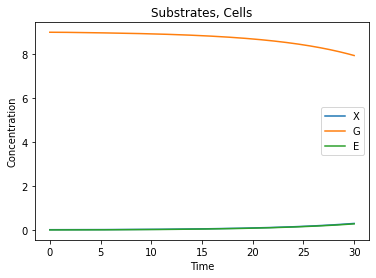

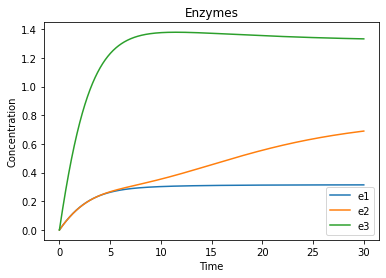

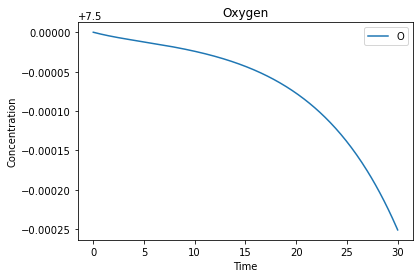

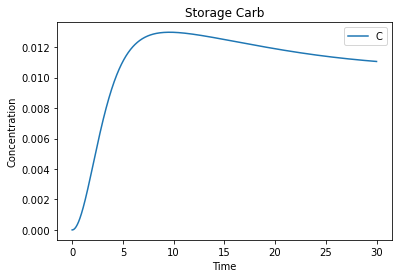

In [82]:
import matplotlib.pyplot as plt

print(sol.y.shape)
X, G, E, O, e1, e2, e3, C = sol.y
t = sol.t

len = 200000

plt.figure()
plt.plot(t, X, label='X')
plt.plot(t[:len], G[:len], label='G')
plt.plot(t, E, label='E')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Substrates, Cells')
plt.legend()

plt.figure()
plt.plot(t, e1, label='e1')
plt.plot(t, e2, label='e2')
plt.plot(t, e3, label='e3')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Enzymes')
plt.legend()

plt.figure()
plt.plot(t, O, label='O')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Oxygen')
plt.legend()

plt.figure()
plt.plot(t, C, label='C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Storage Carb')
plt.legend()

